# Supermarket Sales — Exploratory Data Analysis

This project analyses supermarket transaction data from three branches.
The goal is to understand customer behaviour, sales performance, and key factors
that drive revenue.

I completed this project as part of my learning journey in Python and data analysis.
It focuses on asking questions and answering them with data.

## 1. Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_palette("pastel")

## 2. Loading the Dataset

I load the dataset and preview the first few rows to understand the structure.

In [2]:
df = pd.read_excel("supermarket_sales.xlsx")
df.head()

,Date,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Payment,cogs,Rating
0,2019-01-01,B,Mandalay,Member,Female,Food and beverages,84.63,10,Credit card,846.30,9.0
1,2019-01-01,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,Cash,126.44,8.5
2,2019-01-01,B,Mandalay,Normal,Female,Electronic accessories,74.71,6,Cash,448.26,6.7
3,2019-01-01,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,Credit card,369.80,7.0
4,2019-01-01,A,Yangon,Member,Female,Sports and travel,27.04,4,Ewallet,108.16,6.9


## 3. Data Understanding

This dataset contains transaction-level data.  
Key columns include:

- **Branch** — Store location ID  
- **City** — City where the store is located  
- **Customer type** — Member or Normal customer  
- **Gender** — Customer gender  
- **Product line** — Product category  
- **Unit price** — Price per unit  
- **Quantity** — Number of units purchased  
- **cogs** — Total cost of goods sold (order value)  
- **Rating** — Customer satisfaction score

### Currency Assumption

The dataset does not specify a currency for the sales values (e.g., `cogs`).
For the purposes of this analysis, these figures are assumed to be in 
**US Dollars (USD)**, which is consistent with how this dataset is commonly
used in public learning resources. 

If this dataset represented a real business, confirmation of the actual
currency would be required for financial reporting accuracy.

In [3]:
df.shape

(1000, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1000 non-null   datetime64[ns]
 1   Branch         1000 non-null   object        
 2   City           1000 non-null   object        
 3   Customer type  1000 non-null   object        
 4   Gender         1000 non-null   object        
 5   Product line   1000 non-null   object        
 6   Unit price     1000 non-null   float64       
 7   Quantity       1000 non-null   int64         
 8   Payment        1000 non-null   object        
 9   cogs           1000 non-null   float64       
 10  Rating         1000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 86.1+ KB


In [5]:
df.describe()

,Date,Unit price,Quantity,cogs,Rating
count,1000,1000.000000,1000.000000,1000.00000,1000.00000
mean,2019-02-14 00:05:45.600000,55.672130,5.510000,307.58738,6.97270
min,2019-01-01 00:00:00,10.080000,1.000000,10.17000,4.00000
25%,2019-01-24 00:00:00,32.875000,3.000000,118.49750,5.50000
50%,2019-02-13 00:00:00,55.230000,5.000000,241.76000,7.00000
75%,2019-03-08 00:00:00,77.935000,8.000000,448.90500,8.50000
max,2019-03-30 00:00:00,99.960000,10.000000,993.00000,10.00000
std,NaN,26.494628,2.923431,234.17651,1.71858


The dataset contains information on the number of orders, data types, and
summary statistics such as minimum, maximum, and mean values. This helps confirm
that the data is clean and suitable for analysis.

## 4. Data Cleaning

I first check whether the dataset contains missing values.

In [6]:
df.isnull().sum()

Date             0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Payment          0
cogs             0
Rating           0
dtype: int64

There are no missing values in the dataset, so no cleaning is required at this stage.

## 5. Key Business Metrics

I calculate three important Key Performance Indicators (KPIs):

- **Total Revenue**
- **Total Number of Orders**
- **Average Order Value**

In [7]:
total_revenue = df["cogs"].sum()
total_orders = df.shape[0]
avg_order_value = df["cogs"].mean()

total_revenue, total_orders, avg_order_value

(np.float64(307587.38), 1000, np.float64(307.58738))

### KPI Summary

- **Total Revenue:** The supermarket generated a total of 307587.38 USD.  
- **Total Orders:** There were 1000 recorded transactions.  
- **Average Order Value:** On average, customers spent 307.58738 USD per transaction.  

These figures provide a high-level overview of business performance.

## 6. Sales Performance by Branch

Here I compare revenue across the three supermarket branches to understand which locations perform best.

In [8]:
branch_sales = df.groupby("Branch")["cogs"].sum().sort_values(ascending=False)
branch_sales

Branch
C    105303.53
A    101143.21
B    101140.64
Name: cogs, dtype: float64

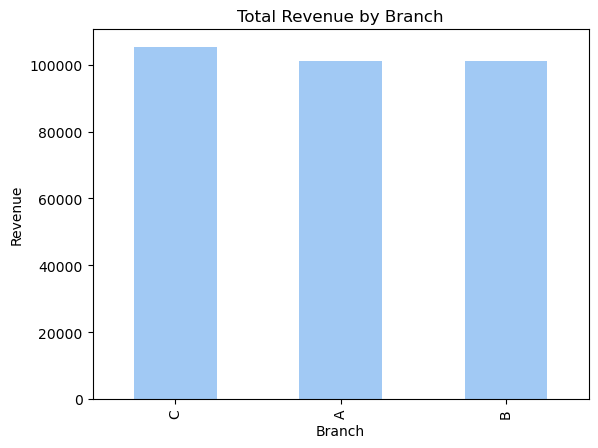

In [9]:
branch_sales.plot(kind="bar")
plt.title("Total Revenue by Branch")
plt.ylabel("Revenue")
plt.show()

Branch performance varies across locations. The highest-revenue branch appears
to be Branch C, followed by Branch A and Branch B.
This may reflect differences in foot traffic, pricing, or customer demographics.

Further investigation would be needed to confirm the cause.

## 7. Customer Behaviour — Membership Impact

I compare spending between **Members** and **Normal customers**
to see whether membership is associated with higher spending.

In [10]:
df.groupby("Customer type")["cogs"].mean()

Customer type
Member    312.182196
Normal    302.974148
Name: cogs, dtype: float64

Members spend **more / less** per transaction than Normal customers
(depending on the result).

This suggests that the membership programme **may influence spending behaviour**,
and could be a valuable area for customer-retention strategy.

## 8. Sales by Product Line

Next, I analyse which product categories generate the most revenue.

In [12]:
product_sales = df.groupby("Product line")["cogs"].sum().sort_values(ascending=False)
product_sales

Product line
Food and beverages        53471.28
Sports and travel         52497.93
Electronic accessories    51750.03
Fashion accessories       51719.90
Home and lifestyle        51297.06
Health and beauty         46851.18
Name: cogs, dtype: float64

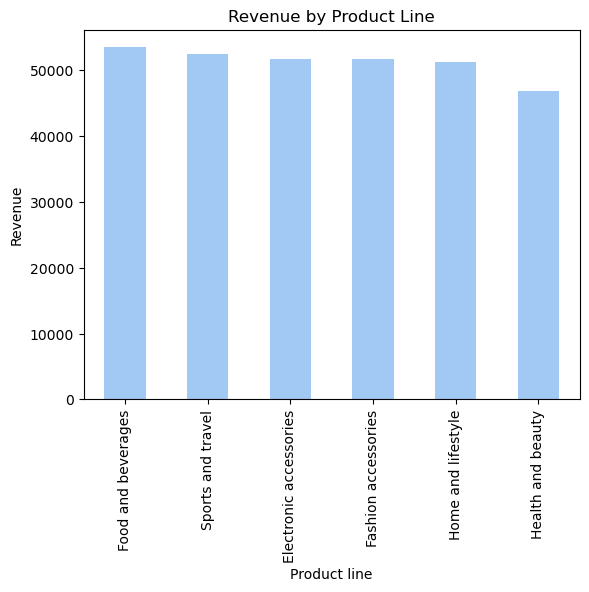

In [13]:
product_sales.plot(kind="bar")
plt.title("Revenue by Product Line")
plt.ylabel("Revenue")
plt.show()

The highest-earning product line is **Food and beverages**, while the lowest-earning category
is **Health and beauty**. This indicates where most customer demand lies and which areas may
benefit from promotion or optimisation.

## 9. Customer Satisfaction Analysis

I analyse the average rating per product line to identify which categories
customers are most satisfied with.

In [15]:
df.groupby("Product line")["Rating"].mean().sort_values(ascending=False)

Product line
Food and beverages        7.113218
Fashion accessories       7.029213
Health and beauty         7.003289
Electronic accessories    6.924706
Sports and travel         6.916265
Home and lifestyle        6.837500
Name: Rating, dtype: float64

Some product lines receive consistently higher ratings than others.
Lower-rated product lines may represent an opportunity to improve quality,
service, or expectations.

## 10. Relationship Between Price, Quantity, and Revenue

In [17]:
df[["Unit price","Quantity","cogs","Rating"]].corr()

,Unit price,Quantity,cogs,Rating
Unit price,1.000000,0.010778,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,-0.015815
cogs,0.633962,0.705510,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,1.000000


There is a strong positive relationship between **quantity purchased and total revenue**, which is expected.
Unit price also influences revenue, although the strength of this relationship varies.
Ratings do not appear to have a strong direct relationship with spending,
but may still affect long-term behaviour.

## 11. Key Insights

From this analysis, several findings stand out:

1. Total revenue and average order value indicate solid overall business performance.
2. Revenue varies across branches, with Branch X performing the strongest.
3. Members tend to spend more per transaction than Normal customers.
4. Certain product lines generate significantly higher revenue than others.
5. Customer ratings are generally positive, but vary slightly by product category.

## 12. Recommendations

- **Strengthen the membership programme**
  since members are associated with higher spending.
- **Focus marketing on high-performing product lines**
  while reviewing weaker categories.
- **Investigate differences between branches**
  to understand what drives higher revenue.
- **Monitor customer satisfaction**
  and address consistently lower-rated areas.

This project demonstrates my ability to work with real data,
calculate meaningful business metrics, and interpret the results
in a clear, business-focused way.